In [2]:
# Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
# Cargar el archivo CSV desde la carpeta proporcionada
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Exploración de datos
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

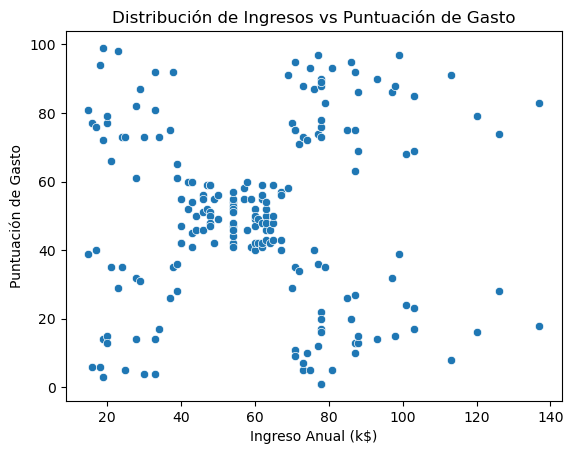

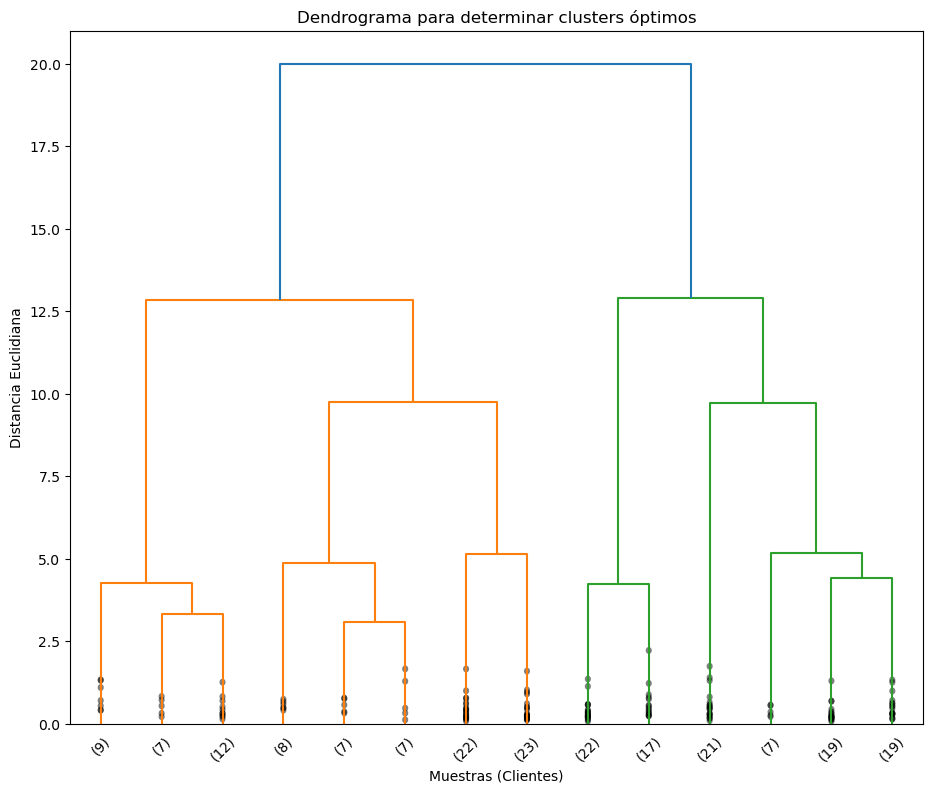

In [15]:
# Gráfica de distribución de ingresos anuales y puntuación de gasto
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'])
plt.title('Distribución de Ingresos vs Puntuación de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.show()

# Selección de características y escalado
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Dendrograma
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(11, 9))
dendrogram(linked, truncate_mode='lastp', p=14, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Dendrograma para determinar clusters óptimos')
plt.xlabel('Muestras (Clientes)')
plt.ylabel('Distancia Euclidiana')
plt.show()

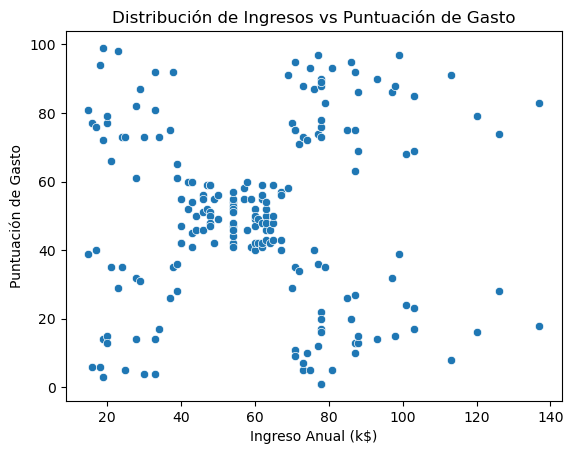

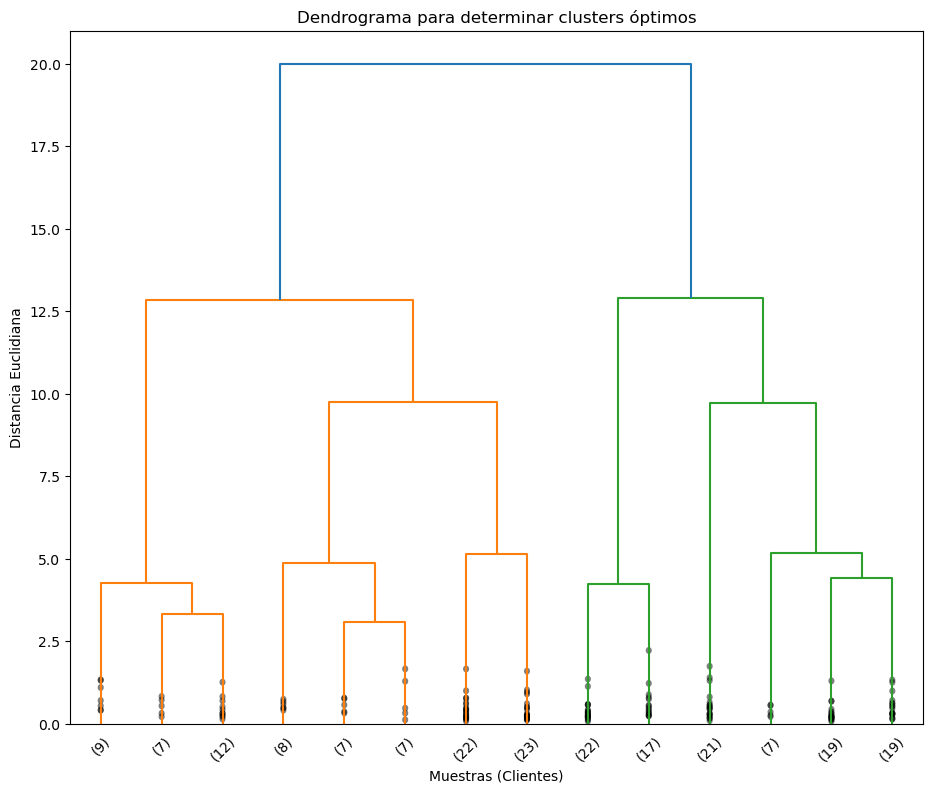

In [16]:
# Gráfica de distribución de ingresos anuales y puntuación de gasto
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'])
plt.title('Distribución de Ingresos vs Puntuación de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.show()

# Selección de características y escalado
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Dendrograma
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(11, 9))
dendrogram(linked, truncate_mode='lastp', p=14, leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.title('Dendrograma para determinar clusters óptimos')
plt.xlabel('Muestras (Clientes)')
plt.ylabel('Distancia Euclidiana')
plt.show()

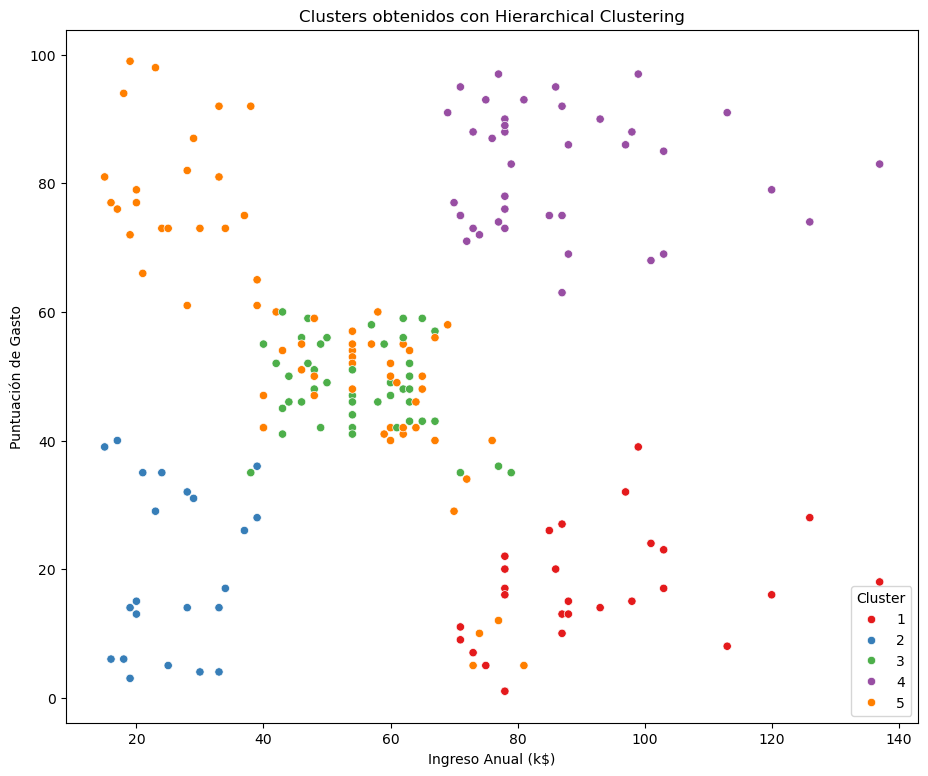

  Cluster        Age                    Annual Income (k$)                 \
                mean        std min max               mean        std min   
0       1  43.892857   8.337063  32  59          91.285714  16.915601  71   
1       2  44.318182  12.800247  19  67          25.772727   7.646548  15   
2       3  56.400000   8.373117  43  70          55.288889   9.834129  38   
3       4  32.692308   3.728650  27  40          86.538462  16.312485  69   
4       5  26.560606   7.043008  18  45          47.363636  18.328319  15   

       Spending Score (1-100)                     
   max                   mean        std min max  
0  137              16.678571   8.973432   1  39  
1   39              20.272727  12.947446   3  40  
2   79              48.355556   6.869417  35  60  
3  137              82.128205   9.364489  63  97  
4   81              56.787879  20.628222   5  99  


In [17]:
# Número óptimo de clusters según el dendrograma
n_clusters = 5

# Aplicar Hierarchical Clustering
clusters = fcluster(linked, n_clusters, criterion='maxclust')

# Agregar los clusters al DataFrame original
data['Cluster'] = clusters

# Visualización de resultados
plt.figure(figsize=(11, 9))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', data=data, palette='Set1'
)
plt.title('Clusters obtenidos con Hierarchical Clustering')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.legend(title='Cluster')
plt.show()

# Resumen de los clusters
cluster_summary = data.groupby('Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max']
}).reset_index()

# Mostrar resumen
print(cluster_summary)